In [91]:
import PyPDF2
import os
from os import listdir
from os.path import isfile,join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp=en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [92]:
import io
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage


def convert_pdf_to_txt(path):
    rsrcmgr = PDFResourceManager()
    retstr = io.StringIO()
    codec = 'utf-8'
    laparams = LAParams()
    device = TextConverter(rsrcmgr, retstr, codec=codec, laparams=laparams)
    fp = open(path, 'rb')
    interpreter = PDFPageInterpreter(rsrcmgr, device)
    password = ""
    maxpages = 0
    caching = True
    pagenos = set()

    for page in PDFPage.get_pages(fp, pagenos, maxpages=maxpages,
                                  password=password,
                                  caching=caching,
                                  check_extractable=True):
        interpreter.process_page(page)

    text = retstr.getvalue()

    fp.close()
    device.close()
    retstr.close()
    return text

convert_pdf_to_txt(onlyfiles[0])

'Johannes S. Otterbach, Ph.D.\n\n67 Glen Ave #308, Oakland, CA 94611 • (857) 756-2022 • johannesotterbach@gmail.com\n\nlinkedin.com/in/jotterbach • jotterbach.github.io • github.com/jotterbach\n\nPROFILE\n\nSelf-motivated Ph.D.-level Physicist with a curious, analytical mind and a passion for all things AI,\nquantum & data. Experience managing and analyzing data using Python (NumPy, SciPy, pandas,\nscikit-learn), Apache Spark (SparkSQL, MLlib), TensorFlow, Postgres, MATLAB, Mathematica\nand developing algorithms and software for near-term quantum hardware. Extensive experience with\nadvanced mathematics, statistics and applied machine learning, as well as presenting and visualizing\ncomplex concepts to diverse audiences.\n\nPROFESSIONAL DEVELOPMENT\n\nMember of Technical Staﬀ (Fellow)\nOpenAI, San Francisco, CA\n\n• Basic research of algorithms for safe Artiﬁcial General Intelligence.\n\n06/2018 - present\n\nResearch Scientist and Software Engineer\nRigetti Quantum Computing, Berkeley,

In [93]:
mypath='resume'
onlyfiles=[os.path.join(mypath,f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath,f))]

In [94]:
onlyfiles[0]

'resume\\Otterbach_resume.pdf'

In [95]:
def pdfextract(file):
    fileReader=PyPDF2.PdfFileReader(open(file,'rb'))
    countPage=fileReader.getNumPages()
    count=0
    text=[]
    while count<countPage:
        pageObj=fileReader.getPage(count)
        count+=1
        t=pageObj.extractText() + '\n'
         # Collapse whitespace
        content = " ".join(t.replace("\xa0", " ").strip().split())
        #print(t)
        text.append(content)
    return text

In [96]:
#pdfextract(onlyfiles[2])

In [97]:
data=pd.read_csv('skill_template.csv')
data
#data['Statistics'].dropna(axis=0)

,Statistics,machine learning,deep learning,r language,python language,NLP,data engineering
0,Statistical modeling,linear regression,neural network,R,Python,nlp,AWS
1,Statistical model,logistic regression,keras,ggplot,flask,natural language processing,ec2
2,probability,k-means,theano,shiny,django,topic modeling,amazon redshift
3,normal distribution,random forest,face detection,cran,pandas,lda,s3
4,poisson distribution,xgboost,neural network,dplyr,numpy,name entity recognition,docker
5,survival models,naïve bayes,convolutional neural network,tidyr,scikitlearn,pos tagging,kubernetes
6,hypothesis testing,pca,recurrent neural network,lubridate,sklearn,word2vec,scala
7,bayesian inference,decision trees,object detection,knitr,matplotlib,word embedding,teradata
8,factor analysis,svd,yolo,NaN,scipy,fsi,scala
9,forecasting,ensemble models,gpu,NaN,bokeh,spacy,google big query


In [98]:
def createProfile(file):
    text=convert_pdf_to_txt(file)
    text=str(text)
    text=text.replace("\\n","")
    text=text.lower()
    print("------------------------printing text--------------------")
    print(text)
    keyword_dict=pd.read_csv("skill_template.csv")
    stat_word=[nlp(text) for text in keyword_dict["Statistics"].dropna(axis=0)]
    nlp_word=[nlp(text) for text in keyword_dict["NLP"].dropna(axis=0)]
    ml_word=[nlp(text) for text in keyword_dict["machine learning"].dropna(axis=0)]
    python_word=[nlp(text) for text in keyword_dict["python language"].dropna(axis=0)]
    r_word=[nlp(text) for text in keyword_dict["r language"].dropna(axis=0)]
    dl_word=[nlp(text) for text in keyword_dict["deep learning"].dropna(axis=0)]
    dataeng_word=[nlp(text) for text in keyword_dict["data engineering"].dropna(axis=0)]
    
    matcher=PhraseMatcher(nlp.vocab)
    matcher.add('Stats',None,*stat_word)
    matcher.add('NLP',None,*nlp_word)
    matcher.add('ML',None,*ml_word)
    matcher.add('Python',None,*python_word)
    matcher.add('DL',None,*dl_word)
    matcher.add('DataEngg',None,*dataeng_word)
    doc=nlp(text)
    
    d=[]
    matches=matcher(doc)
    for match_id,start,end in matches:
        rule_id=nlp.vocab.strings[match_id]
        span=doc[start:end]
        d.append((rule_id,span.text))
    keywords="\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    df=pd.read_csv(StringIO(keywords),names=['Keywords_list'])
    df1=pd.DataFrame(df.Keywords_list.str.split(' ',1).tolist(),columns=['Subject','Keyword'])
    df2=pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns=['Keyword','Count'])
    df3=pd.concat([df1['Subject'],df2['Keyword'],df2['Count']],axis=1)
    df3['Count']=df3['Count'].apply(lambda x:x.rstrip(")"))
    
    base=os.path.basename(file)
    filename=os.path.splitext(base)[0]
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)

In [99]:
final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = createProfile(file)
    final_database = final_database.append(dat)
    i +=1
    #print(final_database)
final_database

------------------------printing text--------------------
johannes s. otterbach, ph.d.

67 glen ave #308, oakland, ca 94611 • (857) 756-2022 • johannesotterbach@gmail.com

linkedin.com/in/jotterbach • jotterbach.github.io • github.com/jotterbach

profile

self-motivated ph.d.-level physicist with a curious, analytical mind and a passion for all things ai,
quantum & data. experience managing and analyzing data using python (numpy, scipy, pandas,
scikit-learn), apache spark (sparksql, mllib), tensorflow, postgres, matlab, mathematica
and developing algorithms and software for near-term quantum hardware. extensive experience with
advanced mathematics, statistics and applied machine learning, as well as presenting and visualizing
complex concepts to diverse audiences.

professional development

member of technical staﬀ (fellow)
openai, san francisco, ca

• basic research of algorithms for safe artiﬁcial general intelligence.

06/2018 - present

research scientist and software engineer
rige


------------------------printing text--------------------
shanshan ding

(440)463-2990· new york, ny

shanshan.ding08@gmail.com· shanshanding.github.io

summary

data scientist and mathematician with four years of tech industry experience in a wide range of functions
including predictive modeling, content discovery, nlp, data warehousing, and product analytics.

education

university of pennsylvania
ph.d. in mathematics

· concentration: probability and combinatorics
· honors: benjamin franklin fellowship, penn presidential fellowship, award of excellence in teaching

philadelphia, pa
2008 - 2014

columbia university
b.a in mathematics and economics

experience

new york, ny
2004 - 2008

compass
senior data scientist
data scientist

new york, ny
july 2017 - october 2017
january 2016 - june 2017

listings data from free-form text descriptions.

and etl of a data warehouse and an a/b testing platform.

execute product analytics projects such as user segmentation.

and back-end engineer

,Candidate Name,Subject,Keyword,Count
0,otterbach,Python,numpy,2
1,otterbach,Python,scipy,2
2,otterbach,Python,pandas,2
3,otterbach,DL,tensorflow,3
4,otterbach,DataEngg,hadoop,2
5,otterbach,DataEngg,scala,1
6,otterbach,DataEngg,sql,1
7,otterbach,DataEngg,s3,1
8,otterbach,DL,keras,1
0,resume,NLP,natural language processing,1


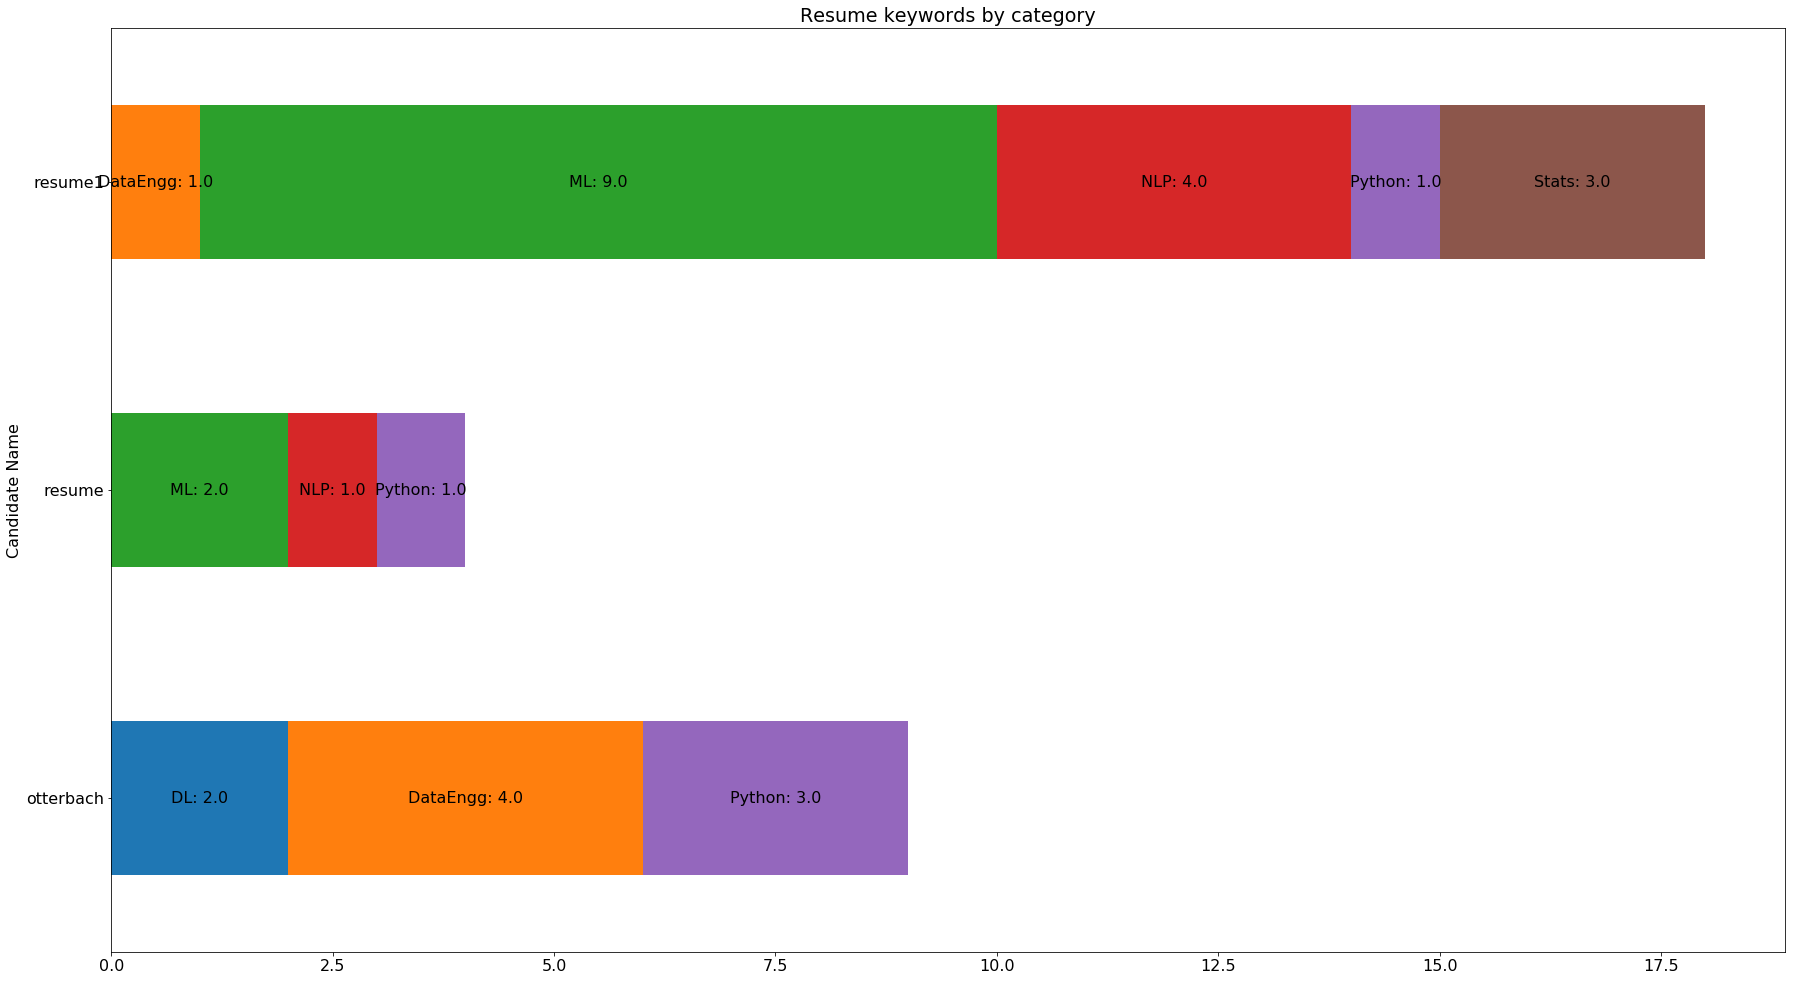

In [106]:

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
#execute the below line if you want to see the candidate profile in a csv format
sample2=new_data.to_csv('sampleresume.csv')
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})
ax = new_data.plot.barh(title="Resume keywords by category", legend=False, figsize=(30,17), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()